**Tabajo Practico 1 - Pandas & Spark RDD**

Cada ejercicio se considera independiente uno del otro, no hay variables que se sobreescriban entre ejercicios, se crean nuevas.

# Instalamos e importamos librerías

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Datos
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Autenticamos con Google Drive

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Bajamos los archivos csv

In [ ]:
downloaded = drive.CreateFile({'id':"1fYyEYw0JCjk6k94bO_GANtS83DofQGp1"})   # replace the id with id of file you want to access
downloaded.GetContentFile('googleplaystore.csv')

In [ ]:
downloaded = drive.CreateFile({'id':"1ViZVfHBZe84ZMWZ0nGUx8eL2gUNZ2hwg"})   # replace the id with id of file you want to access
downloaded.GetContentFile('googleplaystore_user_reviews.csv')

# Analisis exploratorio de datos

In [ ]:
df_app = pd.read_csv("googleplaystore.csv").drop_duplicates()
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- googleplaystore.csv

| Columna | Descripción |Tipo de dato | Comentarios |
|---------|-------------|-------------|------------|
| App | Nombre de la aplicación | object (cadena de texto) | |
| Category | Categoría a la que pertenece la aplicación | category | |
| Rating | Calificación general de los usuarios de la aplicación | float32 (número decimal) | |
| Reviews | Número de reseñas de usuarios para la aplicación | int64 (número entero) | |
| Size | Tamaño de la aplicación | int (número entero) unidad (Mega) | 0 = Varies with device|
| Installs | Número de descargas/instalaciones de usuarios para la aplicación | int64 (número entero) | |
| Type | Tipo de aplicación (gratuita o de pago) | category | |
| Price | Precio de la aplicación | float32 (número flotante) | |
| Content Rating | Grupo de edad al que está dirigida la aplicación: niños / mayores de 21 años / adultos | category | |
| Genres | Una aplicación puede pertenecer a varios géneros (aparte de su categoría principal) | object (cadena de texto)| |
| Last Updated | Fecha actualizada en la que la aplicación se actualizó por última vez en Play Store | datetime64[ns] (fecha y hora) | |
| Current Ver | Versión actual de la aplicación disponible en Play Store | object (cadena de texto) | |
| Android Ver | Versión mínima de Android requerida para ejecutar la aplicación | object (cadena de texto) ||

In [ ]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- Calcular el número de NaN por columna

In [ ]:
nan_count = df_app.isnull().sum()
print(nan_count[nan_count > 0])

Rating            1465
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64


In [ ]:
df_reviews = pd.read_csv("googleplaystore_user_reviews.csv").drop_duplicates()
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# A) Preprocesamiento los tipos de datos

Se sabe que la columna "Reviews" debe ser de tipo númerico entero positivo.
Al momento de convertirla a numerica, con astype, se procuce un error.
Se encuentra un fila que tiene todos sus valores incorrectos.

In [ ]:
df_app[df_app["Reviews"].str.isdecimal() == False]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


- Borramos la ttoda fila que contine el valor "3.0M"

In [ ]:
df_app = df_app[df_app["Reviews"] != '3.0M']

## Columna `Category`

In [ ]:
print("Cantidad de caterias en 'Category':", df_app["Category"].value_counts().count())
df_app["Category"] = df_app["Category"].astype("category")

Cantidad de caterias en 'Category': 33


## Columna `Rating`

In [ ]:
df_app['Rating'] = df_app['Rating'].astype("float32")

## Columna `Rewiers`

In [ ]:
df_app["Reviews"] = df_app["Reviews"].astype('int32')

## Columna `Size`

- Columna "Size" es de tipo numérica.Se reemplaza los "Varies with device" por 0.

In [ ]:
df_app["Size"] = df_app["Size"].replace("Varies with device", 0)

-  Función que elimina la letra "M" y "k" y lo convierte a float32 con la unidad de medida en Mega.

In [ ]:
def convert_to_mega(value):
    if isinstance(value, str):
        if 'M' in value:
            return float(value.replace('M', ''))
        elif 'k' in value:
            return float(value.replace('k', '')) / 1000
    return float(value) / 1000000

In [ ]:
df_app['Size'] = df_app['Size'].map(convert_to_mega)
df_app["Size"] = df_app["Size"].astype("float32")

## Columna `Installs`

- Funcion que elimina los sibolos [',', '+'] y retorna un int.

In [ ]:
def convert_to_int(value):
    if isinstance(value, str):
        return int(value.replace(',', '').replace('+', ''))
    return int(value)

In [ ]:
df_app['Installs'] = df_app['Installs'].map(convert_to_int)

## Columna `Type`

In [ ]:
df_app["Type"] = df_app["Type"].astype("category")

## Columna `Price`

- La columna "Price" es de tipo object, pero tiene valores numéricos y letras (\$). Elimino el signo "$" y la convertimos a numérica.

In [ ]:
df_app["Price"] = df_app["Price"].astype("str").str.replace("$", "")
df_app["Price"] = df_app["Price"].astype("str").astype("float32")

<ipython-input-29-e4466724b8a8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_app["Price"] = df_app["Price"].astype("str").str.replace("$", "")


## Columna `Content Rating`

In [ ]:
df_app["Content Rating"] = df_app["Content Rating"].astype("category")

## Columna `Last Updated` (fecha)

In [ ]:
df_app['Last Updated'] = pd.to_datetime(df_app['Last Updated'])

# Visulizaciones

## Histograma.

**Regla de Sturges**
Una de las reglas prácticas acerca del número de clases que deben considerar al elaborarse un histograma.
Este número viene dado por la siguiente expresión:

$$ c=1+\log_{2}(M) \quad \text{donde M es el tamaño de la muestra.}$$



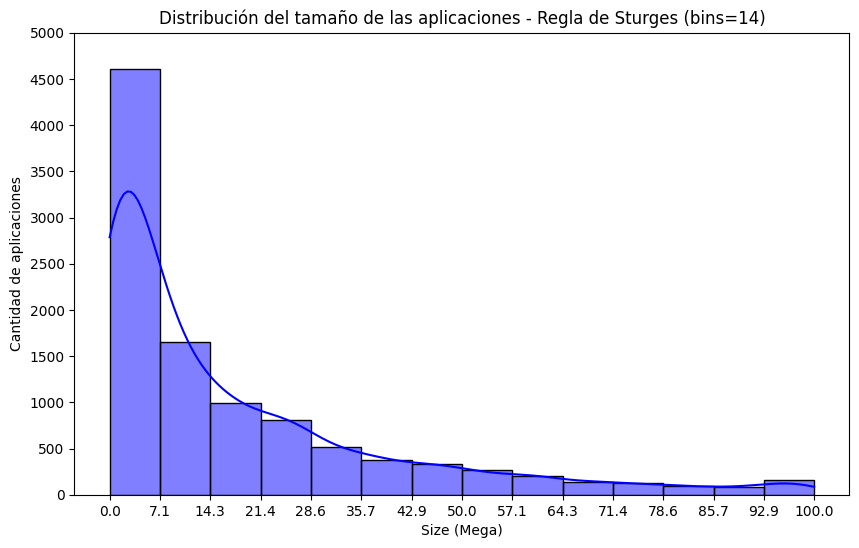

In [ ]:
# Hacemos un hstogram de la variable "Reviews". Colocamos 14 bins.
plt.figure(figsize=(10, 6))
sns.histplot(data=df_app, x="Size", bins=14, kde=True, color="blue")
plt.title("Distribución del tamaño de las aplicaciones - Regla de Sturges (bins=14)")
plt.xlabel("Size (Mega)")
plt.ylabel("Cantidad de aplicaciones")

# hacemos 100/bins para que se vea mejor el gráfico.
bins = 100 / 14
plt.xticks(np.arange(0, 101, step=bins))


#plt.xticks([0, 50, 100])
plt.yticks(range(0, 5001, 500))


plt.show()


## Heapmap

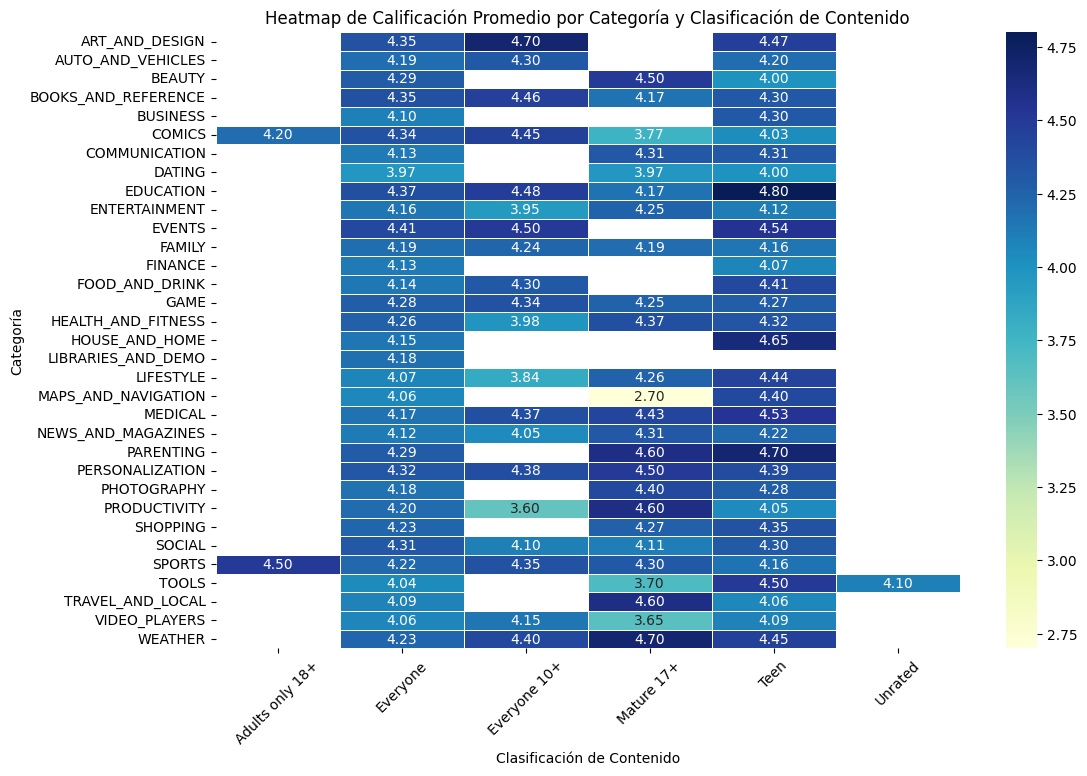

In [ ]:
# Crear un heatmap para visualizar la relación entre la categoría y la calificación promedio
plt.figure(figsize=(12, 8))
heatmap_data = df_app.pivot_table(index='Category', columns='Content Rating', values='Rating', aggfunc='mean')
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Calificación Promedio por Categoría y Clasificación de Contenido')
plt.xlabel('Clasificación de Contenido')
plt.ylabel('Categoría')
plt.xticks(rotation=45)
plt.show()

## Original

Se eligieron: <br>
- Paid: Verde dolar

- Free: A menudo se asocia con la urgencia, la emoción y las ofertas especiales. Algunas empresas utilizan el rojo para atraer la atención hacia productos gratuitos o promociones.

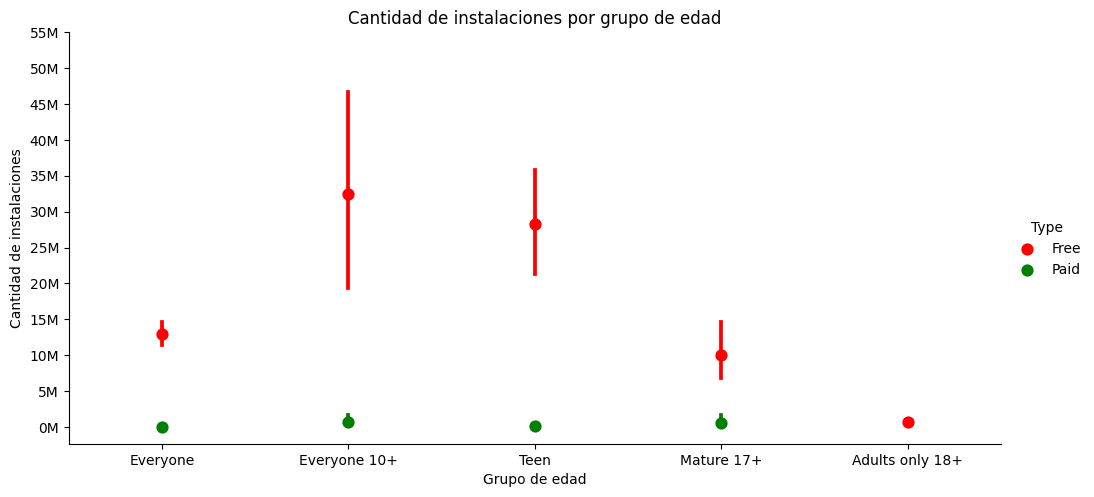

In [ ]:
orden_categorias = ['Everyone', 'Everyone 10+', 'Teen', 'Mature 17+', 'Adults only 18+']

sns.catplot(data=df_app, x="Content Rating", y="Installs", hue="Type", kind="point", height=5, aspect=2, palette=['r', 'g'], join=False, order=orden_categorias)
plt.title("Cantidad de instalaciones por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Cantidad de instalaciones")
plt.yticks(np.arange(0, 6e7, step=0.5e7))
plt.gca().yaxis.set_major_formatter(lambda x, _: '{:0.0f}M'.format(x/1e6))
plt.show()
